In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Iteration 1: 17 misclassified points
Iteration 2: 7 misclassified points
Iteration 3: 4 misclassified points
Iteration 4: 2 misclassified points
Iteration 5: 4 misclassified points
Iteration 6: 3 misclassified points
Iteration 7: 0 misclassified points
Converged: No misclassifications in this iteration.
Perceptron classification accuracy: 1.0


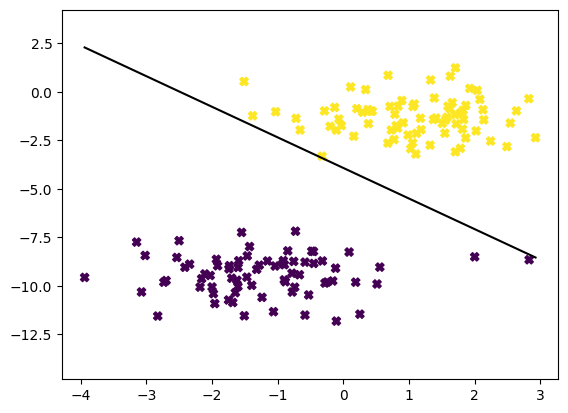

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets

class SimplePerceptron:
    def __init__(self, learning_rate=0.05, max_iterations=500):
        self.lr = learning_rate
        self.max_iters = max_iterations
        self.activation_func = self._step_function
        self.weights = None
        self.bias = None

    def train(self, features, labels):
        num_samples, num_features = features.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        binary_labels = np.where(labels > 0, 1, 0)

        for iteration in range(self.max_iters):
            misclassified_count = 0

            for feature, label in zip(features, binary_labels):
                linear_output = np.dot(feature, self.weights) + self.bias
                predicted_label = self.activation_func(linear_output)

                update = self.lr * (label - predicted_label)

                self.weights += update * feature
                self.bias += update

                misclassified_count += int(update != 0)

            print(f"Iteration {iteration + 1}: {misclassified_count} misclassified points")

            if misclassified_count == 0:
                print("Converged: No misclassifications in this iteration.")
                break

    def predict(self, features):
        linear_output = np.dot(features, self.weights) + self.bias
        predicted_labels = self.activation_func(linear_output)
        return predicted_labels

    def _step_function(self, x):
        return np.where(x >= 0, 1, 0)


# Testing
if __name__ == "__main__":
    def calculate_accuracy(true_labels, predicted_labels):
        return np.sum(true_labels == predicted_labels) / len(true_labels)

    features, labels = datasets.make_blobs(n_samples=200, centers=2, random_state=2)
    features_train, features_test, labels_train, labels_test = train_test_split(
        features, labels, test_size=0.25, random_state=123
    )

    simple_perceptron = SimplePerceptron(learning_rate=0.05, max_iterations=500)
    simple_perceptron.train(features_train, labels_train)
    predictions = simple_perceptron.predict(features_test)

    print("Perceptron classification accuracy:", calculate_accuracy(labels_test, predictions))

    # Display the final decision boundary
    plt.scatter(features_train[:, 0], features_train[:, 1], marker="X", c=labels_train)
    x_1, x_2 = np.amin(features_train[:, 0]), np.amax(features_train[:, 0])
    y_1, y_2 = (-simple_perceptron.weights[0] * x_1 - simple_perceptron.bias) / simple_perceptron.weights[1], (-simple_perceptron.weights[0] * x_2 - simple_perceptron.bias) / simple_perceptron.weights[1]
    plt.plot([x_1, x_2], [y_1, y_2], "k")
    plt.ylim([np.amin(features_train[:, 1]) - 3, np.amax(features_train[:, 1]) + 3])
    plt.show()


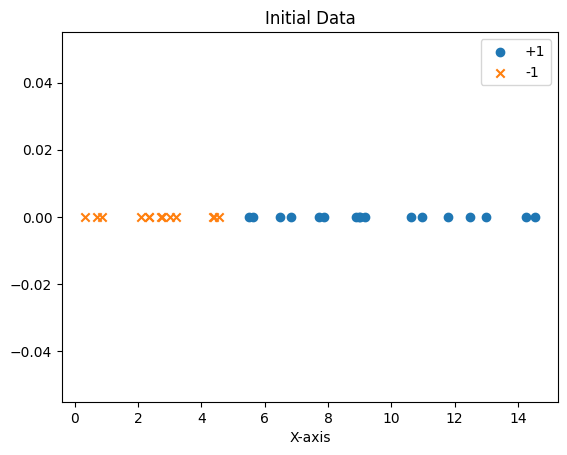

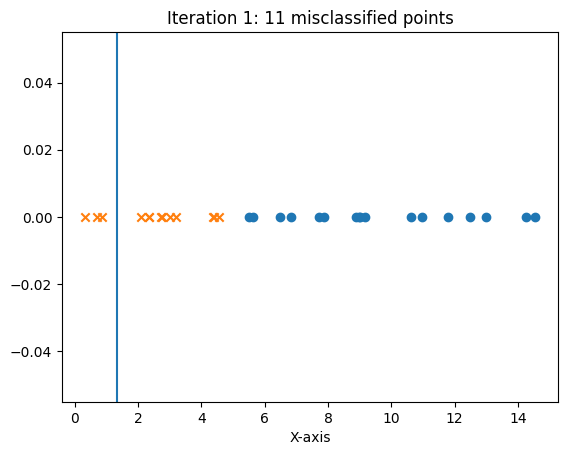

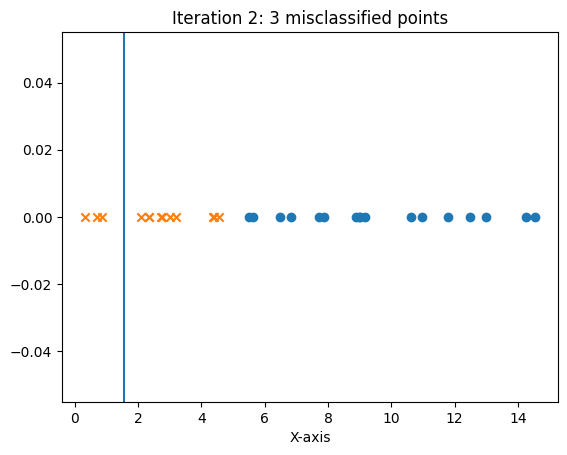

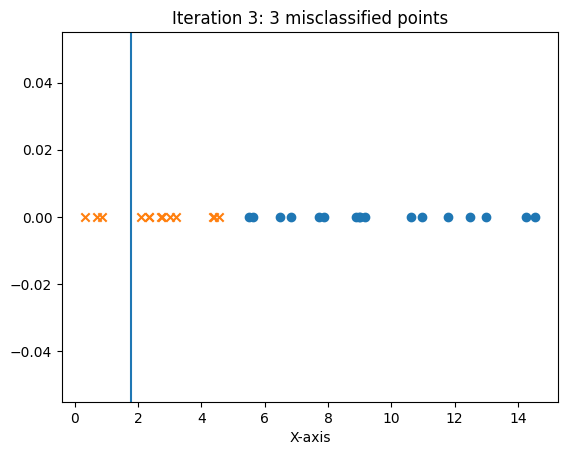

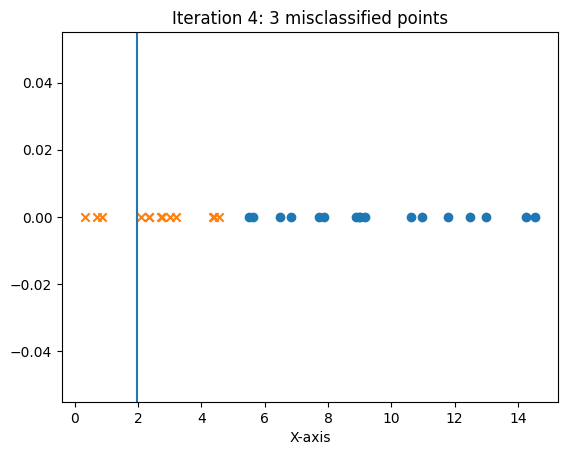

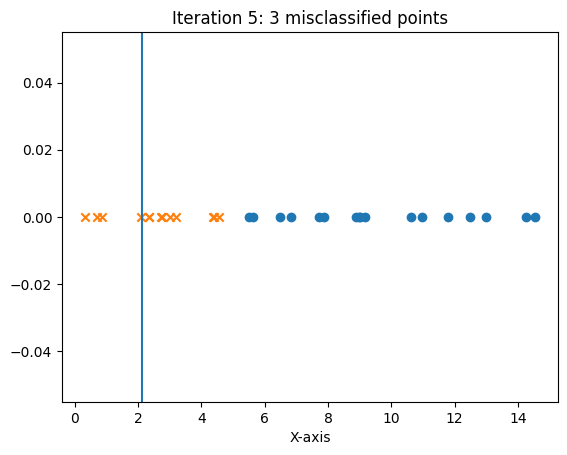

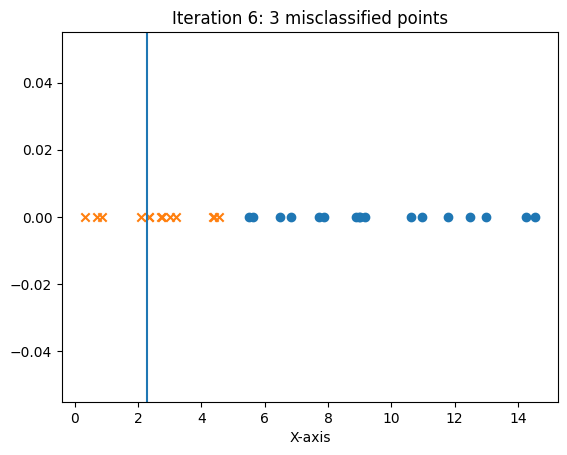

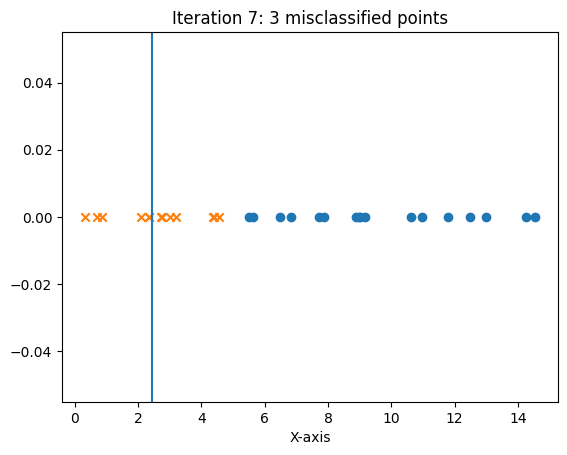

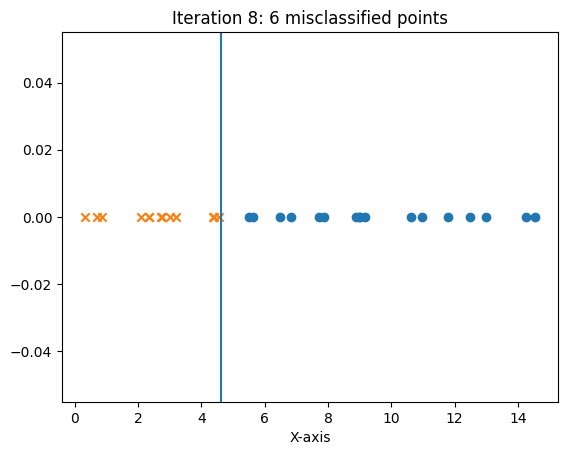

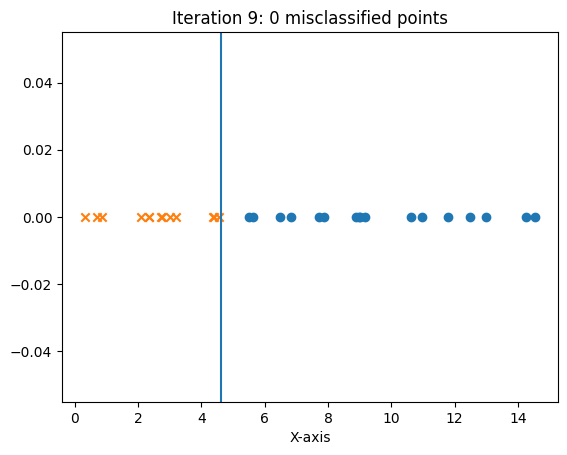

Converged in 9 iterations.


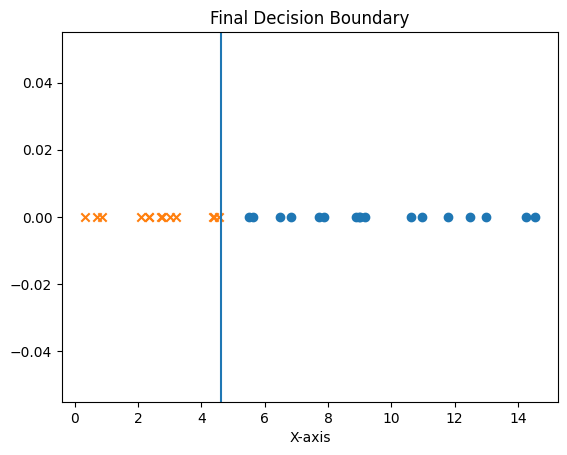

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def generate_synthetic_data(num_points):
    np.random.seed(42)
    X = np.random.rand(num_points) * 15
    y = np.where(X > 5, 1, -1)
    return X, y

def plot_decision_boundary(X, y, decision_boundary, title):
    plt.scatter(X[y == 1], np.zeros_like(X[y == 1]), label='+1', marker='o')
    plt.scatter(X[y == -1], np.zeros_like(X[y == -1]), label='-1', marker='x')
    plt.axvline(x=decision_boundary, label='Decision Boundary')
    plt.xlabel('X-axis')
    plt.title(title)
    plt.show()

def perceptron_learning_algorithm(X, y, learning_rate=1.0, max_iterations=1000):
    num_points = len(X)
    weights = np.random.rand(2)
    X = np.column_stack((np.ones(num_points), X))

    for iteration in range(max_iterations):
        misclassified = 0

        for i in range(num_points):
            prediction = np.sign(np.dot(weights, X[i]))
            if prediction != y[i]:
                misclassified += 1
                weights += learning_rate * y[i] * X[i]

        title = f"Iteration {iteration + 1}: {misclassified} misclassified points"
        plot_decision_boundary(X[:, 1], y, -weights[0] / weights[1], title)

        if misclassified == 0:
            print(f"Converged in {iteration + 1} iterations.")
            break

    return weights

def main():
    num_points = 30
    X, y = generate_synthetic_data(num_points)

    plt.scatter(X[y == 1], np.zeros_like(X[y == 1]), label='+1', marker='o')
    plt.scatter(X[y == -1], np.zeros_like(X[y == -1]), label='-1', marker='x')
    plt.xlabel('X-axis')
    plt.title('Initial Data')
    plt.legend()
    plt.show()

    weights = perceptron_learning_algorithm(X, y)

    plot_decision_boundary(X, y, -weights[0] / weights[1], "Final Decision Boundary")

if __name__ == "__main__":
    main()
